In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import matplotlib
import os

In [2]:
import importlib
import euler_utils
import plotting_utils
import predictions_evaluations
import utils
import idf_plotting

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [3]:
importlib.reload(euler_utils)
importlib.reload(plotting_utils)
importlib.reload(predictions_evaluations)
importlib.reload(utils)
importlib.reload(idf_plotting)

<module 'idf_plotting' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/idf_plotting.py'>

In [4]:
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario/'
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'
last_iter = 60
methods = ['markov','msa02','mw5']

# Read outputs

In [ ]:
data_5_pct = 

In [5]:
no_rej_data_global = {}
for m in ['markov']:
    no_rej_data_global[m] = euler_utils.read_output(
        os.path.join(scratch_folder,"zurich","global_crashed_2"),
        last_iter=53
    )


100%|██████████| 54/54 [00:39<00:00,  1.35it/s]


In [6]:
no_rej_data_fixed = euler_utils.read_output(
    os.path.join(scratch_folder,"zurich","fixed"),
    last_iter=52
)


100%|██████████| 53/53 [00:48<00:00,  1.09it/s]


In [7]:
k_values = [10,25,50,100]

no_rej_data_dynamic_CN = {}
for m in methods:
    no_rej_data_dynamic_CN[m] = {}
    for k in [10,25,50]: #k_values:
        if m != "markov" and k != 25:
            continue
        if k == 10:
            no_rej_data_dynamic_CN[m][k] = euler_utils.read_output(
            os.path.join(scratch_folder,"zurich","dynamic_CN", "k"+str(k)+'_crashed_2'),
            last_iter=57
        )
        else:
            no_rej_data_dynamic_CN[m][k] = euler_utils.read_output(
                os.path.join(scratch_folder,"zurich","dynamic_CN", m, "k"+str(k)),
                last_iter=last_iter
            )

100%|██████████| 61/61 [00:54<00:00,  1.12it/s]


In [9]:
no_rej_data_square_850 = {}
for m in ['markov']:
    no_rej_data_square_850[m] = euler_utils.read_output(
        os.path.join(scratch_folder,"zurich","square","850"),
        last_iter=45
    )


100%|██████████| 46/46 [00:39<00:00,  1.15it/s]


In [10]:
no_rej_data_hex_500 = {}
for method in ['markov']:
    no_rej_data_hex_500[method] = euler_utils.read_output(
        os.path.join(scratch_folder,"zurich","hex","500"),
        last_iter=45
    )

100%|██████████| 46/46 [00:38<00:00,  1.21it/s]


In [11]:
no_rej_data_dynamic_FD = {}
for m in ['markov']:
    no_rej_data_dynamic_FD[m] = {}
    for d in [500]:
        no_rej_data_dynamic_FD[m][d] = euler_utils.read_output(
            os.path.join(scratch_folder,"zurich","dynamic_FD", str(d)),
            last_iter=last_iter
        )

100%|██████████| 61/61 [00:51<00:00,  1.20it/s]


In [14]:
no_rej_data_dynamic_PN = {}
for m in ['markov']:
    no_rej_data_dynamic_PN[m] = {}
    for p in [0.1, 0.2, 0.3]: #[0.1,0.2,0.3]:
        km = 1000
        if p == 0.2:
            no_rej_data_dynamic_PN[m][p] = euler_utils.read_output(
            os.path.join(scratch_folder,"zurich","dynamic_PN", "p"+str(p) + '_km' + str(km)),
            last_iter=last_iter
            )
        elif p == 0.3:
            no_rej_data_dynamic_PN[m][p] = euler_utils.read_output(
            os.path.join(scratch_folder,"zurich","dynamic_PN", "p"+str(p) + '_km' + str(km)),
            last_iter=51
            )
        else:
            no_rej_data_dynamic_PN[m][p] = euler_utils.read_output(
                os.path.join(scratch_folder,"zurich","dynamic_PN", m, "p"+str(p) + '_km' + str(km)),
                last_iter=last_iter
            )

100%|██████████| 52/52 [00:47<00:00,  1.10it/s]


In [15]:
data_no_rej = {}
data_no_rej['dynamic_CN'] = no_rej_data_dynamic_CN
data_no_rej['fixed'] = no_rej_data_fixed
data_no_rej['global'] = no_rej_data_global
data_no_rej['square_850'] = no_rej_data_square_850
data_no_rej['hex_500'] = no_rej_data_hex_500
data_no_rej['dynamic_PN'] = no_rej_data_dynamic_PN
data_no_rej['dynamic_FD'] = no_rej_data_dynamic_FD


In [24]:
compare_methods = [
    ("Fixed feedback", data_no_rej['fixed'], 52),
    ("Global feedback", data_no_rej['global']['markov'], 53),
    ("Square 850m", data_no_rej['square_850']['markov'], 45),
    ("Hex 500m", data_no_rej['hex_500']['markov'], 45),
    ("KNN-CN=10", data_no_rej['dynamic_CN']['markov'][10], 57),
    ("KNN-CN=25", data_no_rej['dynamic_CN']['markov'][25], 59),
    ("KNN-CN=25", data_no_rej['dynamic_CN']['markov'][25], last_iter),
    ("KNN-CN=50", data_no_rej['dynamic_CN']['markov'][50], last_iter),
    #("KNN-CN=100", data_no_rej['dynamic_CN']['markov'][100], last_iter),
    ("KNN-PN=0.1, 1000", data_no_rej['dynamic_PN']['markov'][0.1], 60),
    ("KNN-PN=0.2, 1000", data_no_rej['dynamic_PN']['markov'][0.2], last_iter),
    ("KNN-PN=0.3, 1000", data_no_rej['dynamic_PN']['markov'][0.3], 51),
    ("FD=500", data_no_rej['dynamic_FD']['markov'][500], last_iter)
]

In [71]:
t = plotting_utils.get_multiple_stats_table(compare_methods, add_iter=True)

In [72]:
t

Fixed feedback (it.52)  \
Number of rides                                           311698   
Wait time (min)                   Mean                   80.3822   
                                  Median                 69.8333   
                                  Std                    60.1493   
                                  75-perc                  107.4   
                                  99-perc                242.535   
                                  Max                    508.117   
Travel time (min)                 Mean                   31.1148   
                                  Median                   18.65   
                                  Std                    34.5038   
                                  75-perc                43.5667   
                                  99-perc                  151.6   
                                  Max                    525.017   
Mean direct distance (km)                                 3.6981   
Average detour factor (time wise)                        2.84578   
Total execution time                             6 days 10:52:20   

                                          Global feedback (it.53)  \
Number of rides                                            221318   
Wait time (min)                   Mean                    16.0479   
                                  Median                      5.8   
                                  Std                     22.5238   
                                  75-perc                 23.5667   
                                  99-perc                 80.6833   
                                  Max                     344.833   
Travel time (min)                 Mean                    21.5655   
                                  Median                  14.7167   
                                  Std                     21.4954   
                                  75-perc                 28.8833   
                                  99-perc                 99.3138   
                                  Max                     323.683   
Mean direct distance (km)                                 3.87289   
Average detour factor (time wise)                         1.69926   
Total execution time                              5 days 06:14:26   

                                          Square 850m (it.45)  \
Number of rides                                        273889   
Wait time (min)                   Mean                8.59575   
                                  Median              5.91667   
                                  Std                 8.67405   
                                  75-perc             12.2833   
                                  99-perc                36.9   
                                  Max                 239.067   
Travel time (min)                 Mean                18.6881   
                                  Median                 13.5   
                                  Std                  17.355   
                                  75-perc               25.15   
                                  99-perc              82.902   
                                  Max                 343.883   
Mean direct distance (km)                              3.7063   
Average detour factor (time wise)                     1.55601   
Total execution time                          3 days 08:50:34   

                                          Hex 500m (it.45) KNN-CN=10 (it.57)  \
Number of rides                                     279233            278140   
Wait time (min)                   Mean             13.3191            8.0827   
                                  Median                11           5.36667   
                                  Std              11.0517           8.00138   
                                  75-perc             20.8             11.45   
                                  99-perc           44.678              33.6   
                                  Max        

In [73]:
t = t.drop('Total execution time', axis=0, level=0)

In [74]:
t = t.astype('float')

In [29]:
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{llrrrrrrrrrrrr}
\toprule
                                  &     &  Fixed feedback (it.52) &  Global feedback (it.53) &  Square 850m (it.45) &  Hex 500m (it.45) &  KNN-CN=10 (it.57) &  KNN-CN=25 (it.59) &  KNN-CN=25 (it.60) &  KNN-CN=50 (it.60) &  KNN-PN=0.1, 1000 (it.60) &  KNN-PN=0.2, 1000 (it.60) &  KNN-PN=0.3, 1000 (it.51) &  FD=500 (it.60) \\
\midrule
\textbf{Number of rides} & {} &               311698.00 &                221318.00 &            273889.00 &         279233.00 &          278140.00 &          274027.00 &          267943.00 &          265236.00 &                 274793.00 &                 285019.00 &                 283599.00 &       275201.00 \\
\textbf{Wait time (min)} & \textbf{Mean} &                   80.38 &                    16.05 &                 8.60 &             13.32 &               8.08 &               9.22 &              40.83 &              17.10 &                     17.

In [75]:
print(t['Global feedback (it.53)'].round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{llr}
\toprule
                                  &     &  Global feedback (it.53) \\
\midrule
\textbf{Number of rides} & {} &                221318.00 \\
\textbf{Wait time (min)} & \textbf{Mean} &                    16.05 \\
                                  & \textbf{Median} &                     5.80 \\
                                  & \textbf{Std} &                    22.52 \\
                                  & \textbf{75-perc} &                    23.57 \\
                                  & \textbf{99-perc} &                    80.68 \\
                                  & \textbf{Max} &                   344.83 \\
\textbf{Travel time (min)} & \textbf{Mean} &                    21.57 \\
                                  & \textbf{Median} &                    14.72 \\
                                  & \textbf{Std} &                    21.50 \\
                                  & \textbf{75-perc} &  

In [119]:
compare_methods_smoothing = [
    ("KNN-CN 25 Markov", data_no_rej['dynamic_CN']['markov'][25], 59),
    ("KNN-CN 25 Markov", data_no_rej['dynamic_CN']['markov'][25], last_iter),
    ("KNN-CN 25 MSA=0.2", data_no_rej['dynamic_CN']['msa02'][25], 59),
    ("KNN-CN 25 MSA=0.2", data_no_rej['dynamic_CN']['msa02'][25], last_iter),
    ("KNN-CN 25 MW=5", data_no_rej['dynamic_CN']['mw5'][25], 59),
    ("KNN-CN 25 MW=5", data_no_rej['dynamic_CN']['mw5'][25], last_iter)
]

In [65]:
t = plotting_utils.get_multiple_stats_table(compare_methods_smoothing, add_iter=True)

In [66]:
t = t.drop('Total execution time', axis=0, level=0)
t = t.astype('float')

In [67]:
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{llrrrrrr}
\toprule
                                  &     &  KNN-CN=25 Markov (it.59) &  KNN-CN=25 Markov (it.60) &  KNN-CN=25 MSA=0.2 (it.59) &  KNN-CN=25 MSA=0.2 (it.60) &  KNN-CN=25 MW=5 (it.59) &  KNN-CN=25 MW=5 (it.60) \\
\midrule
\textbf{Number of rides} & {} &                 274027.00 &                 267943.00 &                  266034.00 &                  267151.00 &               262439.00 &               268737.00 \\
\textbf{Wait time (min)} & \textbf{Mean} &                      9.22 &                     40.83 &                      11.11 &                       8.93 &                    9.13 &                    7.65 \\
                                  & \textbf{Median} &                      6.42 &                     22.68 &                       7.97 &                       5.95 &                    6.55 &                    5.13 \\
                                  & \textbf{Std} &   

count       mean        std        min        25%  \
Fixed feedback (it.52)    31343  70.051137  60.259470  -9.950000  28.041667   
Global feedback (it.53)   22622   0.229343  22.330373 -15.782609 -13.515942   
Square 850m (it.45)       22071  -4.570404   8.386128 -57.538889  -9.817766   
Hex 500m (it.45)          29067   3.100828   8.668791 -35.785417  -1.666667   
KNN-CN=10 (it.57)         37993   1.856005   7.379091 -34.909911  -1.986509   
KNN-CN=25 (it.59)         18626  -5.482884   8.198084 -74.249256  -9.805997   
KNN-CN=25 (it.60)         30763  33.802286  57.725436 -35.962127   1.591740   
KNN-CN=50 (it.60)         21978   3.171656  13.684574 -54.169681  -2.828950   
KNN-PN=0.1, 1000 (it.60)  19143   1.769512  10.483235 -68.385871  -2.642144   
KNN-PN=0.2, 1000 (it.60)  29495   3.291248   9.217934 -36.584137  -1.878775   
KNN-PN=0.3, 1000 (it.51)  34022   7.017612  10.791863 -39.293873  -0.729933   
FD=500 (it.60)            25790  -1.907258   7.440305 -55.402866  -5.580896   

                                50%        75%         95%         99%  \
Fixed feedback (it.52)    59.450000  97.216667  187.681667  232.088667   
Global feedback (it.53)  -10.015942   7.850724   43.216558   63.733224   
Square 850m (it.45)       -3.300601   0.000000    6.612827   16.164687   
Hex 500m (it.45)           2.213946   8.028203   16.327502   28.127540   
KNN-CN=10 (it.57)          0.391351   4.704994   14.946868   23.785671   
KNN-CN=25 (it.59)         -4.254234  -0.647260    5.456234   13.431044   
KNN-CN=25 (it.60)         13.140587  46.483902  129.836064  293.943264   
KNN-CN=50 (it.60)          0.940354   8.508845   20.560936   57.942777   
KNN-PN=0.1, 1000 (it.60)   1.380761   7.299184   16.360816   33.642331   
KNN-PN=0.2, 1000 (it.60)   1.484402   8.353940   18.065549   30.359367   
KNN-PN=0.3, 1000 (it.51)   5.581850  13.473154   25.202023   36.211093   
FD=500 (it.60)            -1.374790   1.892189    8.618463   17.678309   

                                 max  25% abs error  50% abs error  \
Fixed feedback (it.52)    484.316667      28.041667      59.450000   
Global feedback (it.53)   312.834058       9.599276      13.182609   
Square 850m (it.45)       121.401852       1.863545       4.965385   
Hex 500m (it.45)           91.983333       1.885110       4.920068   
KNN-CN=10 (it.57)         143.748333       1.275269       2.973916   
KNN-CN=25 (it.59)          90.778539       2.191618       5.250581   
KNN-CN=25 (it.60)         599.077323       4.239316      13.845412   
KNN-CN=50 (it.60)         364.058875       2.027269       5.458298   
KNN-PN=0.1, 1000 (it.60)  104.731691       2.101595       5.199642   
KNN-PN=0.2, 1000 (it.60)  149.509821       1.734132       4.305507   
KNN-PN=0.3, 1000 (it.51)  160.193680       2.554048       7.265228   
FD=500 (it.60)             96.174895       1.567811       3.641872   

                          75% abs error  95% abs error  99% abs error  \
Fixed feedback (it.52)        97.216667     187.681667     232.088667   
Global feedback (it.53)       15.282609      43.216558      63.733224   
Square 850m (it.45)           10.517262      18.723232      25.655665   
Hex 500m (it.45)               9.550285      17.609270      28.317636   
KNN-CN=10 (it.57)              6.585522      15.676357      24.171359   
KNN-CN=25 (it.59)             10.247918      20.528759      29.764998   
KNN-CN=25 (it.60)             46.483902     129.836064     293.943264   
KNN-CN=50 (it.60)             11.568398      22.535050      57.942777   
KNN-PN=0.1, 1000 (it.60)      10.232445      21.205203      37.394527   
KNN-PN=0.2, 1000 (it.60)       9.875888      19.274564      30.798982   
KNN-PN=0.3, 1000 (it.51)      13.904898      25.224811      36.233375   
FD=500 (it.60)                 7.589463      15.657331      23.794272   

                          std abs error          MSE       RMSE        MAE  \
Fixed feedback (it.52)        58.594769  8538.249708  92.402650  71.448603   
Global feedback (i

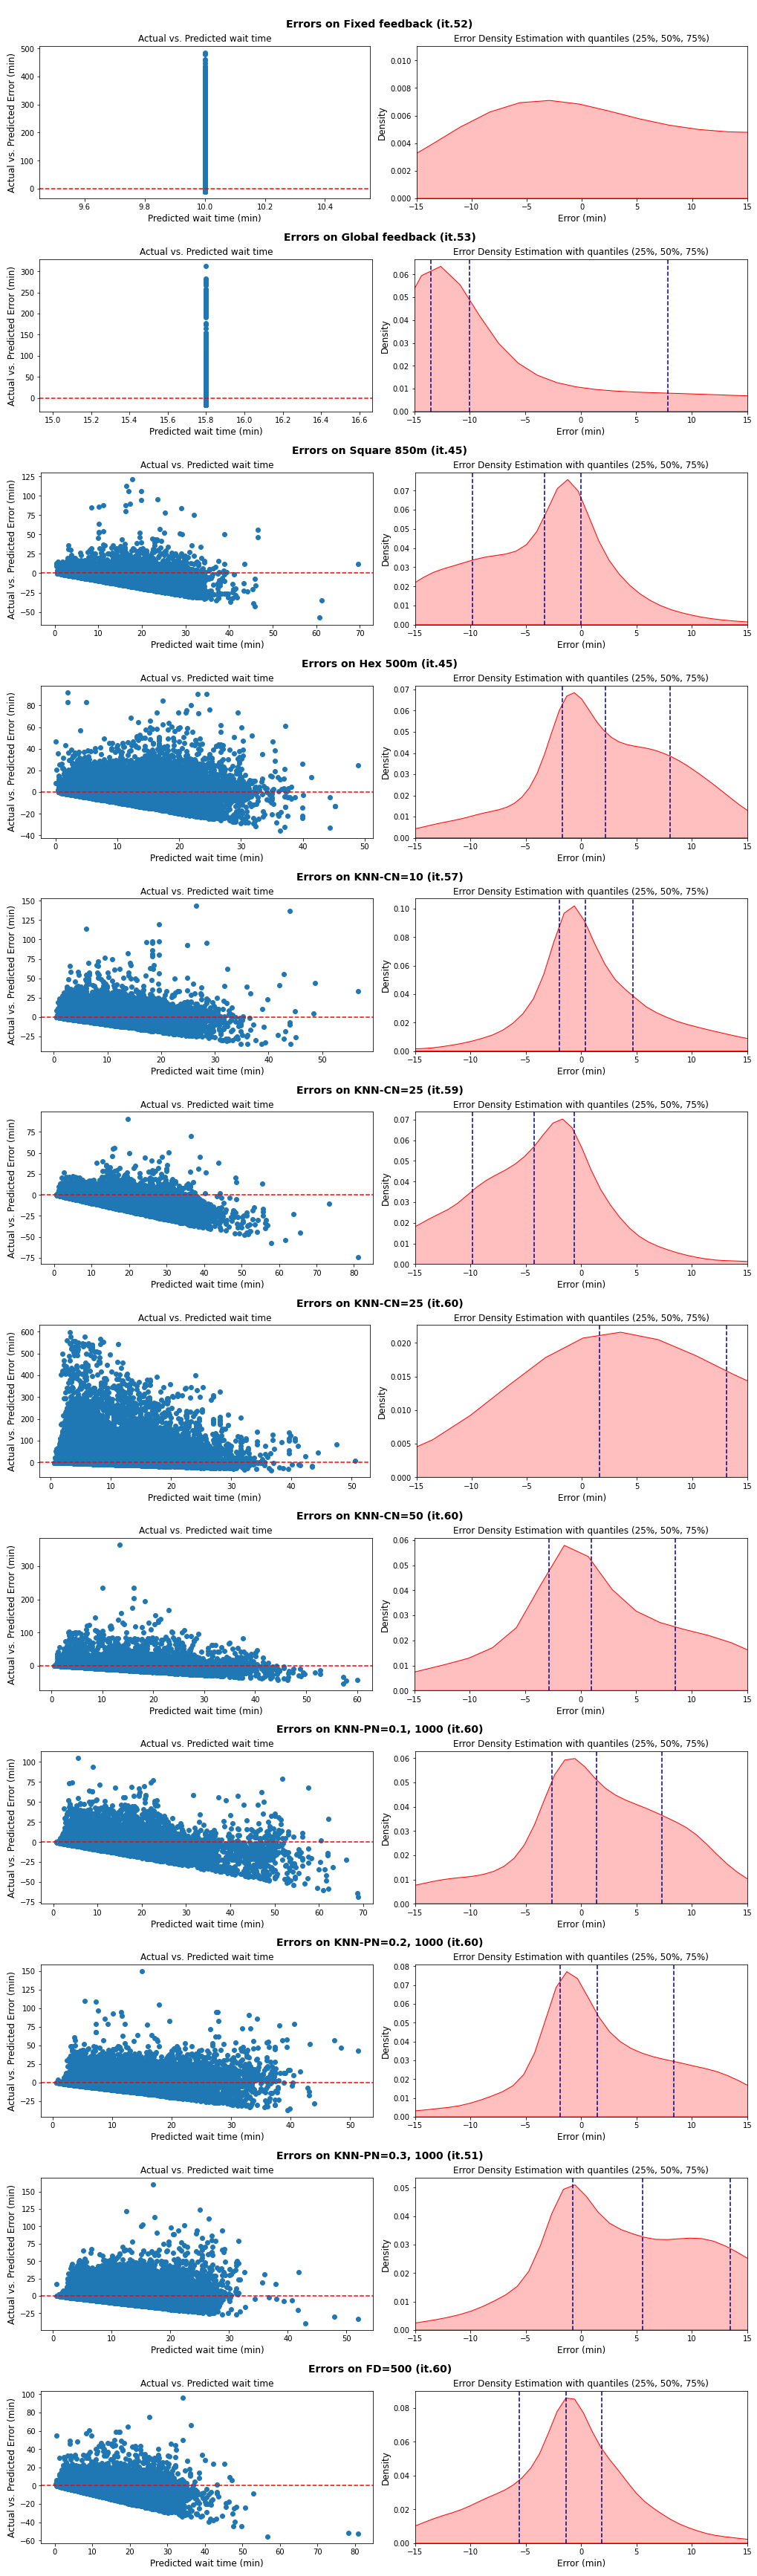

In [44]:
table_compare_methods = predictions_evaluations.plot_multiple_actual_vs_fitted(compare_methods, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True)

In [45]:
t = table_compare_methods.copy(deep=True)

In [46]:
t = t.drop(columns=['min', '25%', '50%', '75%', '95%', '99%', 'max', 'MSE'])

In [47]:
t

count       mean        std  25% abs error  \
Fixed feedback (it.52)    31343  70.051137  60.259470      28.041667   
Global feedback (it.53)   22622   0.229343  22.330373       9.599276   
Square 850m (it.45)       22071  -4.570404   8.386128       1.863545   
Hex 500m (it.45)          29067   3.100828   8.668791       1.885110   
KNN-CN=10 (it.57)         37993   1.856005   7.379091       1.275269   
KNN-CN=25 (it.59)         18626  -5.482884   8.198084       2.191618   
KNN-CN=25 (it.60)         30763  33.802286  57.725436       4.239316   
KNN-CN=50 (it.60)         21978   3.171656  13.684574       2.027269   
KNN-PN=0.1, 1000 (it.60)  19143   1.769512  10.483235       2.101595   
KNN-PN=0.2, 1000 (it.60)  29495   3.291248   9.217934       1.734132   
KNN-PN=0.3, 1000 (it.51)  34022   7.017612  10.791863       2.554048   
FD=500 (it.60)            25790  -1.907258   7.440305       1.567811   

                          50% abs error  75% abs error  95% abs error  \
Fixed feedback (it.52)        59.450000      97.216667     187.681667   
Global feedback (it.53)       13.182609      15.282609      43.216558   
Square 850m (it.45)            4.965385      10.517262      18.723232   
Hex 500m (it.45)               4.920068       9.550285      17.609270   
KNN-CN=10 (it.57)              2.973916       6.585522      15.676357   
KNN-CN=25 (it.59)              5.250581      10.247918      20.528759   
KNN-CN=25 (it.60)             13.845412      46.483902     129.836064   
KNN-CN=50 (it.60)              5.458298      11.568398      22.535050   
KNN-PN=0.1, 1000 (it.60)       5.199642      10.232445      21.205203   
KNN-PN=0.2, 1000 (it.60)       4.305507       9.875888      19.274564   
KNN-PN=0.3, 1000 (it.51)       7.265228      13.904898      25.224811   
FD=500 (it.60)                 3.641872       7.589463      15.657331   

                          99% abs error  std abs error       RMSE        MAE  \
Fixed feedback (it.52)       232.088667      58.594769  92.402650  71.448603   
Global feedback (it.53)       63.733224      15.770700  22.331057  15.810159   
Square 850m (it.45)           25.655665       6.610890   9.550526   6.892655   
Hex 500m (it.45)              28.317636       6.434165   9.206545   6.584983   
KNN-CN=10 (it.57)             24.171359       5.813706   7.608831   4.908679   
KNN-CN=25 (it.59)             29.764998       6.720783   9.862403   7.217899   
KNN-CN=25 (it.60)            293.943264      56.668936  66.893290  35.543549   
KNN-CN=50 (it.60)             57.942777      11.264748  14.047008   8.391895   
KNN-PN=0.1, 1000 (it.60)      37.394527       7.659740  10.631258   7.372382   
KNN-PN=0.2, 1000 (it.60)      30.798982       7.132236   9.787734   6.703055   
KNN-PN=0.3, 1000 (it.51)      36.233375       8.765511  12.872753   9.427278   
FD=500 (it.60)                23.794272       5.478806   7.680731   5.382965   

                          % errors < 0 (overestimated)  
Fixed feedback (it.52)                       11.674058  
Global feedback (it.53)                      68.243303  
Square 850m (it.45)                          74.953559  
Hex 500m (it.45)                             37.585578  
KNN-CN=10 (it.57)                            46.279578  
KNN-CN=25 (it.59)                            79.185010  
KNN-CN=25 (it.60)                            20.170334  
KNN-CN=50 (it.60)                            44.990445  
KNN-PN=0.1, 1000 (it.60)                     42.830277  
KNN-PN=0.2, 1000 (it.60)                     40.935752  
KNN-PN=0.3, 1000 (it.51)                     29.060608  
FD=500 (it.60)                               62.481582

In [48]:
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  count &   mean &    std &  25\% abs error &  50\% abs error &  75\% abs error &  95\% abs error &  99\% abs error &  std abs error &   RMSE &    MAE &  \% errors < 0 (overestimated) \\
\midrule
\textbf{Fixed feedback (it.52)  } &  31343 &  70.05 &  60.26 &          28.04 &          59.45 &          97.22 &         187.68 &         232.09 &          58.59 &  92.40 &  71.45 &                         11.67 \\
\textbf{Global feedback (it.53) } &  22622 &   0.23 &  22.33 &           9.60 &          13.18 &          15.28 &          43.22 &          63.73 &          15.77 &  22.33 &  15.81 &                         68.24 \\
\textbf{Square 850m (it.45)     } &  22071 &  -4.57 &   8.39 &           1.86 &           4.97 &          10.52 &          18.72 &          25.66 &           6.61 &   9.55 &   6.89 &                         74.95 \\
\textbf{Hex 500m (it.45)        } &  29067 &   3

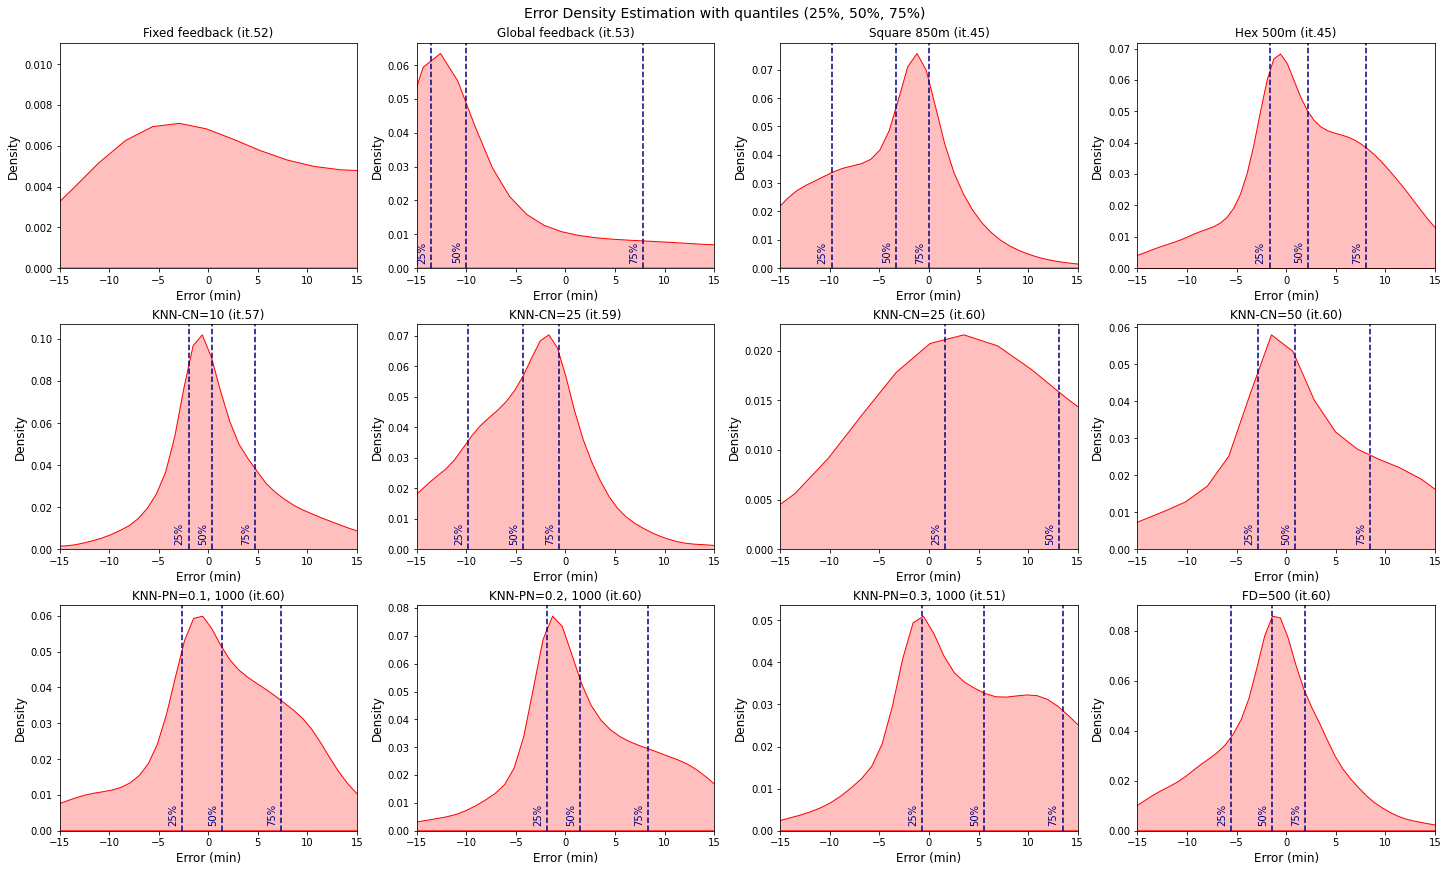

In [61]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(compare_methods, 'waitTime', 3,4, kde_plot_limit=15, add_iteration_to_title=True)

count       mean        std        min       25%  \
KNN-CN=25 Markov (it.59)   18626  -5.482884   8.198084 -74.249256 -9.805997   
KNN-CN=25 Markov (it.60)   30763  33.802286  57.725436 -35.962127  1.591740   
KNN-CN=25 MSA=0.2 (it.59)  26592  -0.703018   9.206635 -43.167782 -5.953653   
KNN-CN=25 MSA=0.2 (it.60)  27387  -2.746890   8.278995 -35.523066 -8.056066   
KNN-CN=25 MW=5 (it.59)     28830  -1.906391   7.159602 -59.233057 -5.372522   
KNN-CN=25 MW=5 (it.60)     31948  -2.014974   6.624495 -42.887476 -5.412898   

                                 50%        75%         95%         99%  \
KNN-CN=25 Markov (it.59)   -4.254234  -0.647260    5.456234   13.431044   
KNN-CN=25 Markov (it.60)   13.140587  46.483902  129.836064  293.943264   
KNN-CN=25 MSA=0.2 (it.59)  -0.907787   4.208418   13.918821   22.652062   
KNN-CN=25 MSA=0.2 (it.60)  -2.227607   1.642610    9.344700   17.079096   
KNN-CN=25 MW=5 (it.59)     -1.483995   1.764591    7.945423   16.402400   
KNN-CN=25 MW=5 (it.60)     -1.677019   1.059448    7.489919   15.640680   

                                  max  25% abs error  50% abs error  \
KNN-CN=25 Markov (it.59)    90.778539       2.191618       5.250581   
KNN-CN=25 Markov (it.60)   599.077323       4.239316      13.845412   
KNN-CN=25 MSA=0.2 (it.59)  111.609052       1.981996       5.047938   
KNN-CN=25 MSA=0.2 (it.60)  141.311599       2.015651       4.955118   
KNN-CN=25 MW=5 (it.59)     100.419572       1.587437       3.536544   
KNN-CN=25 MW=5 (it.60)     100.638257       1.468902       3.345133   

                           75% abs error  95% abs error  99% abs error  \
KNN-CN=25 Markov (it.59)       10.247918      20.528759      29.764998   
KNN-CN=25 Markov (it.60)       46.483902     129.836064     293.943264   
KNN-CN=25 MSA=0.2 (it.59)      10.312505      17.466204      24.942373   
KNN-CN=25 MSA=0.2 (it.60)       9.521854      16.082468      22.278257   
KNN-CN=25 MW=5 (it.59)          7.178491      15.100436      22.027101   
KNN-CN=25 MW=5 (it.60)          6.964684      13.570417      19.775229   

                           std abs error          MSE       RMSE        MAE  \
KNN-CN=25 Markov (it.59)        6.720783    97.266986   9.862403   7.217899   
KNN-CN=25 Markov (it.60)       56.668936  4474.712231  66.893290  35.543549   
KNN-CN=25 MSA=0.2 (it.59)       6.267550    85.253181   9.233265   6.780191   
KNN-CN=25 MSA=0.2 (it.60)       5.934661    76.084668   8.722653   6.392532   
KNN-CN=25 MW=5 (it.59)          5.290796    54.892449   7.408944   5.186514   
KNN-CN=25 MW=5 (it.60)          4.942454    47.942686   6.924066   4.849210   

                           % errors < 0 (overestimated)  
KNN-CN=25 Markov (it.59)                      79.185010  
KNN-CN=25 Markov (it.60)                      20.170334  
KNN-CN=25 MSA=0.2 (it.59)                     56.505716  
KNN-CN=25 MSA=0.2 (it.60)                     66.626502  
KNN-CN=25 MW=5 (it.59)                        63.725286  
KNN-CN=25 MW=5 (it.60)                        67.375110

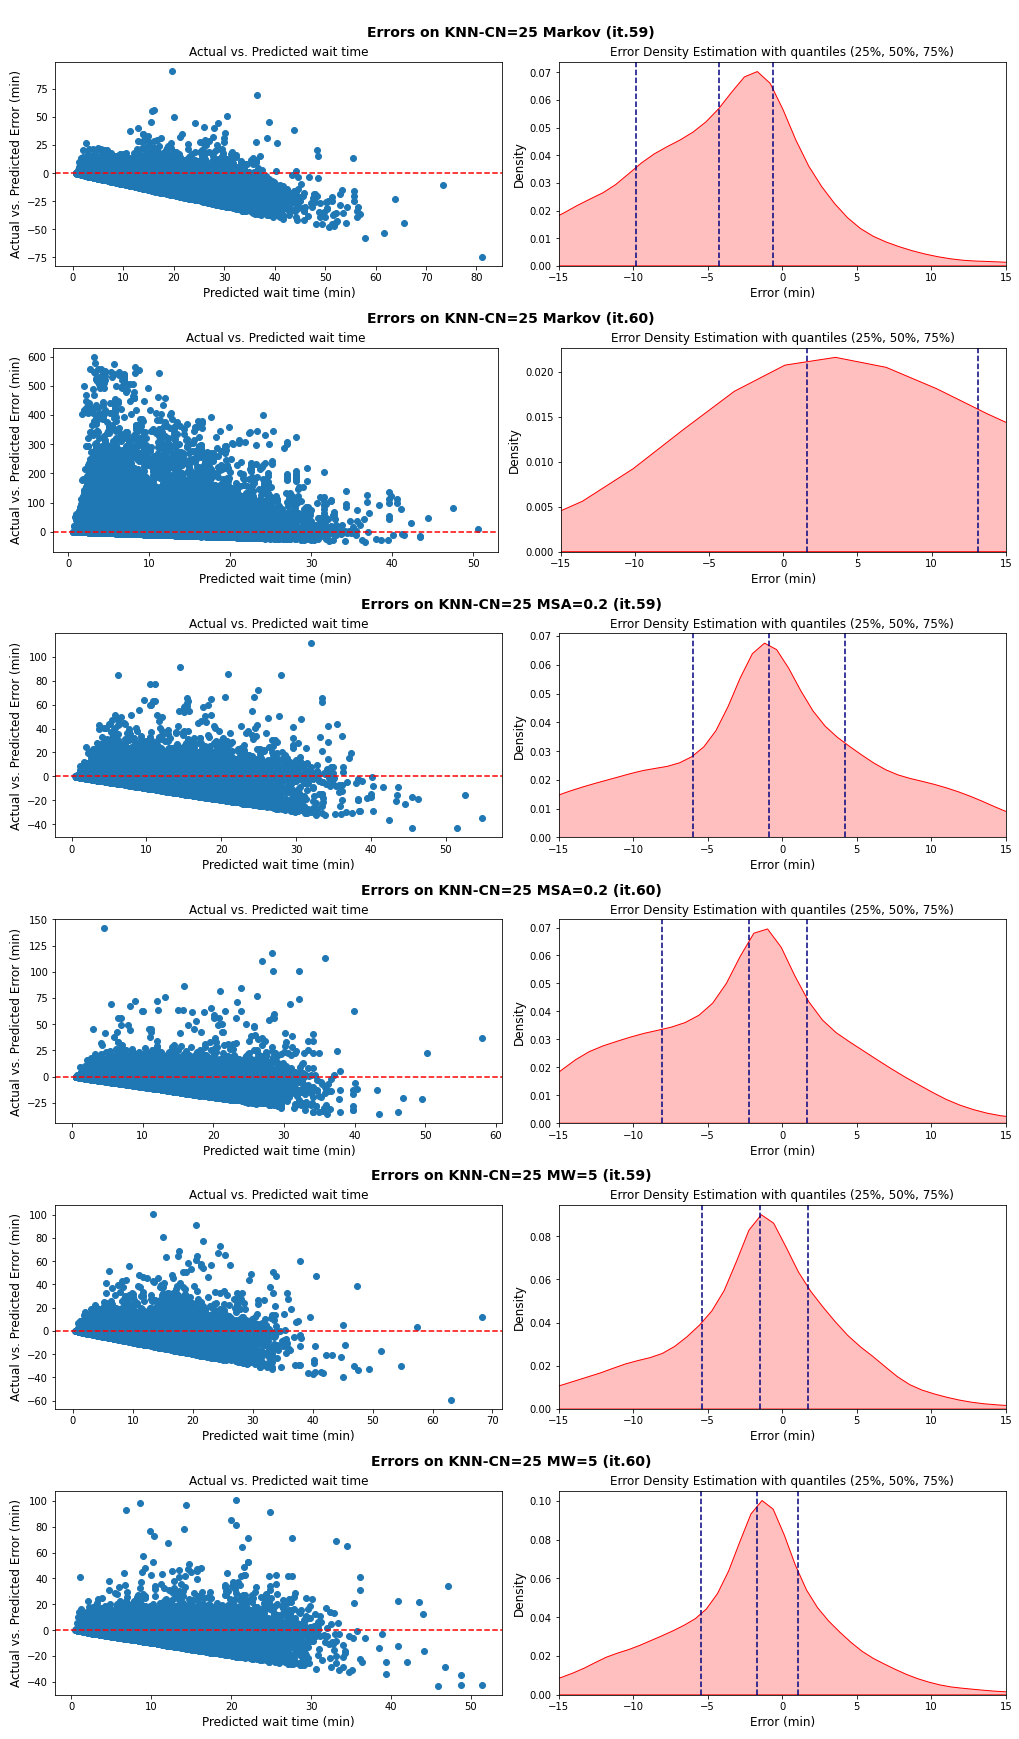

In [59]:
_ = predictions_evaluations.plot_multiple_actual_vs_fitted(compare_methods_smoothing, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True)

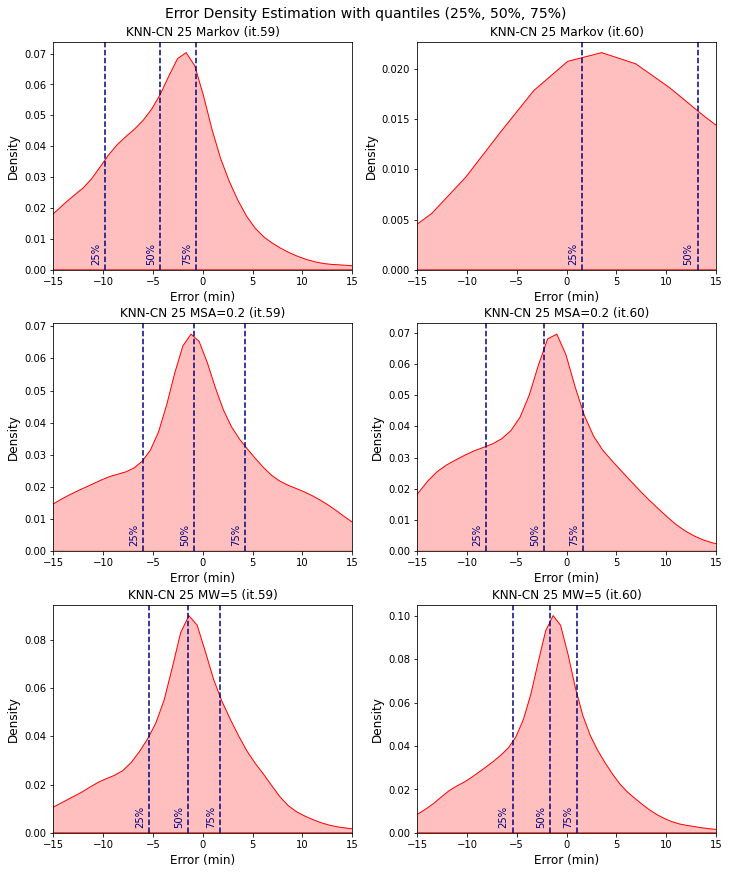

In [122]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(compare_methods_smoothing, 'waitTime', 3,2,kde_plot_limit=15, add_iteration_to_title=True, filename='/cluster/home/mfrancesc/IVT/paper_figures/zurich_kde_errors_smoothing.pdf')

In [49]:
importlib.reload(predictions_evaluations)


<module 'predictions_evaluations' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/predictions_evaluations.py'>

In [50]:
t = predictions_evaluations.get_confidence_intervals_table(compare_methods, 'waitTime', add_iteration_to_title=True)

In [51]:
t

% trips with abs error < 2.5  \
Fixed feedback (it.52)                        2.999075   
Global feedback (it.53)                       4.858103   
Square 850m (it.45)                          32.010330   
Hex 500m (it.45)                             31.747342   
KNN-CN=10 (it.57)                            44.484510   
KNN-CN=25 (it.59)                            28.229357   
KNN-CN=25 (it.60)                            16.779898   
KNN-CN=50 (it.60)                            30.130130   
KNN-PN=0.1, 1000 (it.60)                     29.331871   
KNN-PN=0.2, 1000 (it.60)                     34.673674   
KNN-PN=0.3, 1000 (it.51)                     24.525307   
FD=500 (it.60)                               38.003102   

                          % trips with abs error < 5  \
Fixed feedback (it.52)                      6.323581   
Global feedback (it.53)                    10.419061   
Square 850m (it.45)                        50.183499   
Hex 500m (it.45)                           50.493687   
KNN-CN=10 (it.57)                          66.767562   
KNN-CN=25 (it.59)                          48.276603   
KNN-CN=25 (it.60)                          27.900400   
KNN-CN=50 (it.60)                          47.679498   
KNN-PN=0.1, 1000 (it.60)                   48.957844   
KNN-PN=0.2, 1000 (it.60)                   53.995592   
KNN-PN=0.3, 1000 (it.51)                   39.812474   
FD=500 (it.60)                             60.655293   

                          % trips with abs error < 7.5  \
Fixed feedback (it.52)                       11.169958   
Global feedback (it.53)                      17.257537   
Square 850m (it.45)                          62.566263   
Hex 500m (it.45)                             64.685038   
KNN-CN=10 (it.57)                            78.769773   
KNN-CN=25 (it.59)                            62.616772   
KNN-CN=25 (it.60)                            35.903520   
KNN-CN=50 (it.60)                            59.655110   
KNN-PN=0.1, 1000 (it.60)                     62.701771   
KNN-PN=0.2, 1000 (it.60)                     65.760298   
KNN-PN=0.3, 1000 (it.51)                     51.022868   
FD=500 (it.60)                               74.606437   

                          % trips with abs error < 10  
Fixed feedback (it.52)                      16.593817  
Global feedback (it.53)                     26.730616  
Square 850m (it.45)                         73.186534  
Hex 500m (it.45)                            76.884439  
KNN-CN=10 (it.57)                           86.147448  
KNN-CN=25 (it.59)                           74.036293  
KNN-CN=25 (it.60)                           42.502357  
KNN-CN=50 (it.60)                           69.624170  
KNN-PN=0.1, 1000 (it.60)                    74.016612  
KNN-PN=0.2, 1000 (it.60)                    75.477200  
KNN-PN=0.3, 1000 (it.51)                    60.978191  
FD=500 (it.60)                              83.920124

In [52]:
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{lrrrr}
\toprule
{} &  \% trips with abs error < 2.5 &  \% trips with abs error < 5 &  \% trips with abs error < 7.5 &  \% trips with abs error < 10 \\
\midrule
\textbf{Fixed feedback (it.52)  } &                          3.00 &                        6.32 &                         11.17 &                        16.59 \\
\textbf{Global feedback (it.53) } &                          4.86 &                       10.42 &                         17.26 &                        26.73 \\
\textbf{Square 850m (it.45)     } &                         32.01 &                       50.18 &                         62.57 &                        73.19 \\
\textbf{Hex 500m (it.45)        } &                         31.75 &                       50.49 &                         64.69 &                        76.88 \\
\textbf{KNN-CN=10 (it.57)       } &                         44.48 &                       66.77 &               

In [61]:
compare_smoothening = [
    ("CN 25 markov", data_no_rej['dynamic_CN']['markov'][25], last_iter),
    ("CN 25 MSA = 0.2", data_no_rej['dynamic_CN']['msa02'][25], last_iter),
    ("CN 25 MW = 5", data_no_rej['dynamic_CN']['mw5'][25], last_iter)
]

count       mean        std        min  \
CN 25 markov on iteration 60     30763  33.802286  57.725436 -35.962127   
CN 25 MSA = 0.2 on iteration 60  27387  -2.746890   8.278995 -35.523066   
CN 25 MW = 5 on iteration 60     31948  -2.014974   6.624495 -42.887476   

                                      25%        50%        75%         95%  \
CN 25 markov on iteration 60     1.591740  13.140587  46.483902  129.836064   
CN 25 MSA = 0.2 on iteration 60 -8.056066  -2.227607   1.642610    9.344700   
CN 25 MW = 5 on iteration 60    -5.412898  -1.677019   1.059448    7.489919   

                                        99%         max  25% abs error  \
CN 25 markov on iteration 60     293.943264  599.077323       4.239316   
CN 25 MSA = 0.2 on iteration 60   17.079096  141.311599       2.015651   
CN 25 MW = 5 on iteration 60      15.640680  100.638257       1.468902   

                                 50% abs error  75% abs error  95% abs error  \
CN 25 markov on iteration 60         13.845412      46.483902     129.836064   
CN 25 MSA = 0.2 on iteration 60       4.955118       9.521854      16.082468   
CN 25 MW = 5 on iteration 60          3.345133       6.964684      13.570417   

                                 99% abs error  std abs error          MSE  \
CN 25 markov on iteration 60        293.943264      56.668936  4474.712231   
CN 25 MSA = 0.2 on iteration 60      22.278257       5.934661    76.084668   
CN 25 MW = 5 on iteration 60         19.775229       4.942454    47.942686   

                                      RMSE        MAE  \
CN 25 markov on iteration 60     66.893290  35.543549   
CN 25 MSA = 0.2 on iteration 60   8.722653   6.392532   
CN 25 MW = 5 on iteration 60      6.924066   4.849210   

                                 % errors < 0 (overestimated)  
CN 25 markov on iteration 60                        20.170334  
CN 25 MSA = 0.2 on iteration 60                     66.626502  
CN 25 MW = 5 on iteration 60                        67.375110

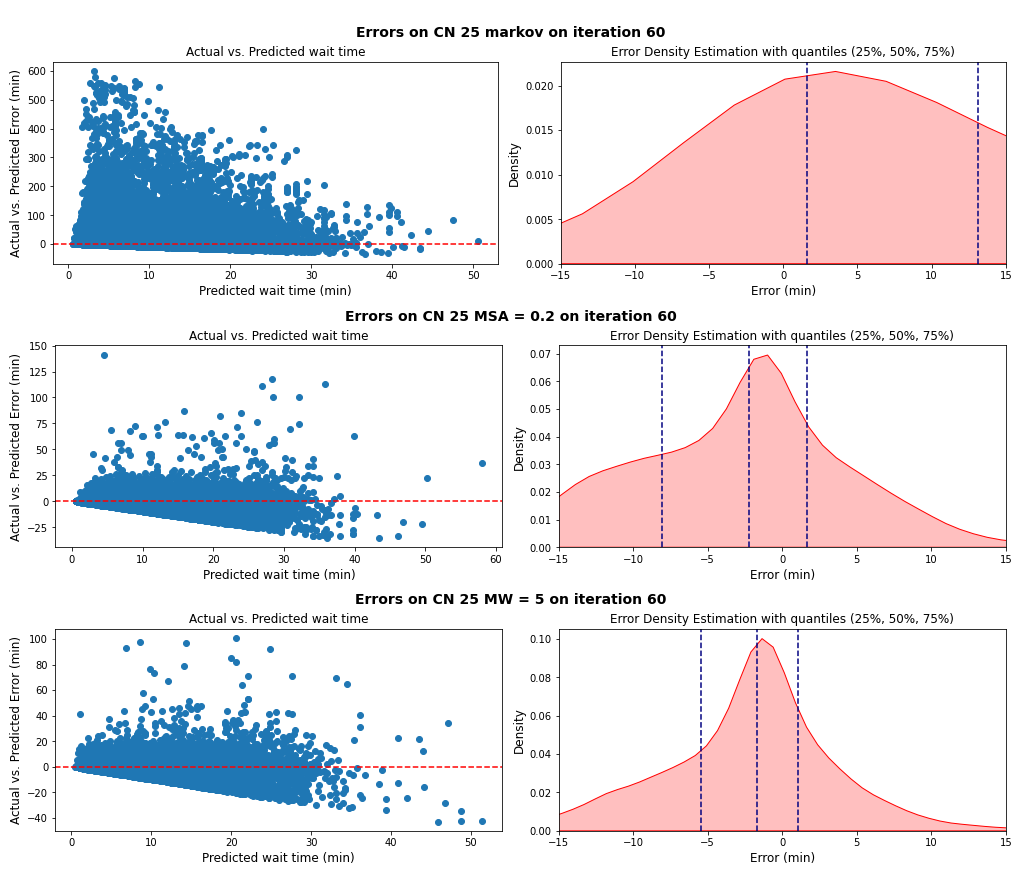

In [62]:
_ = predictions_evaluations.plot_multiple_actual_vs_fitted(compare_smoothening, 'waitTime', kde_plot_limit=15)

In [110]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ("CN 25 markov", data_no_rej['dynamic_CN']['markov'][25], c_gradient[0], '-'),
    ("CN 25 MSA = 0.2", data_no_rej['dynamic_CN']['msa02'][25], c_gradient[1], '--'),
    ("CN 25 MW = 5", data_no_rej['dynamic_CN']['mw5'][25], c_gradient[2], ':')
]


In [117]:
importlib.reload(predictions_evaluations)

<module 'predictions_evaluations' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/predictions_evaluations.py'>

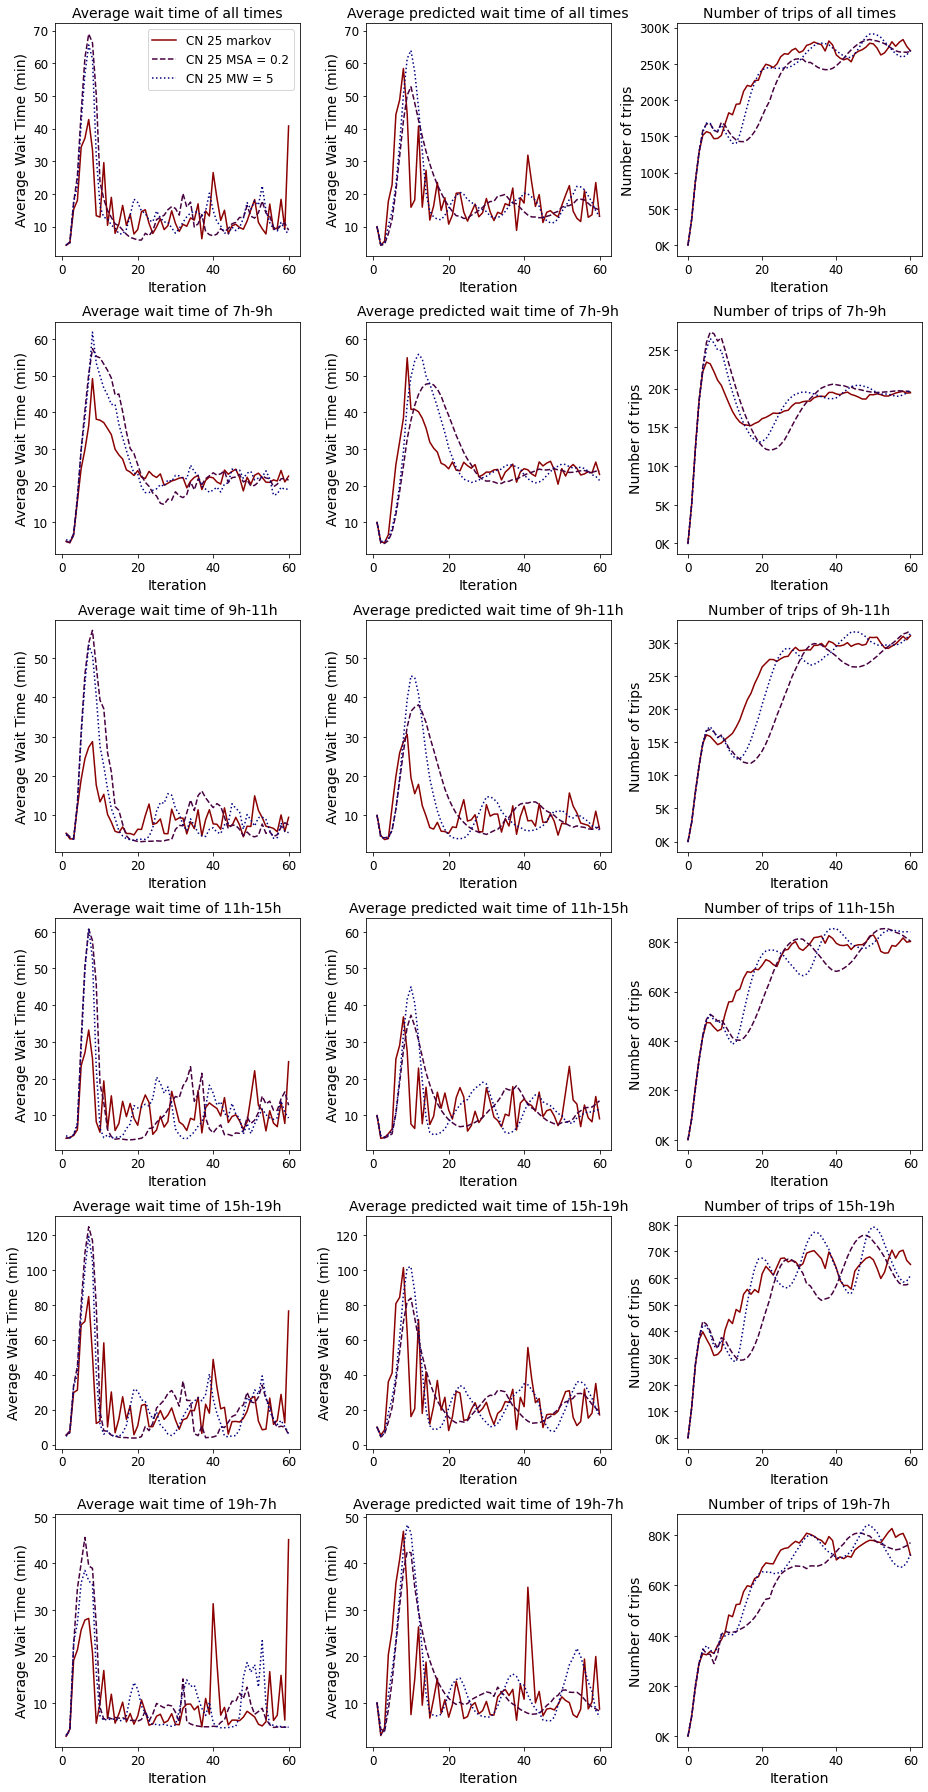

In [118]:

predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color, save=True, filename='/cluster/home/mfrancesc/IVT/paper_figures/zurich_smoothing.pdf')

In [88]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 4)

plot_list_color_fixed = [
    ("Fixed", data_no_rej['fixed'], c_gradient[0], '-'),
    ("Global", data_no_rej['global']['markov'], c_gradient[1], '-'),
    ("Hex 500", data_no_rej['hex_500']['markov'], c_gradient[2], '-'),
    ("Square 850", data_no_rej['square_850']['markov'], c_gradient[3], '-'),
    
]

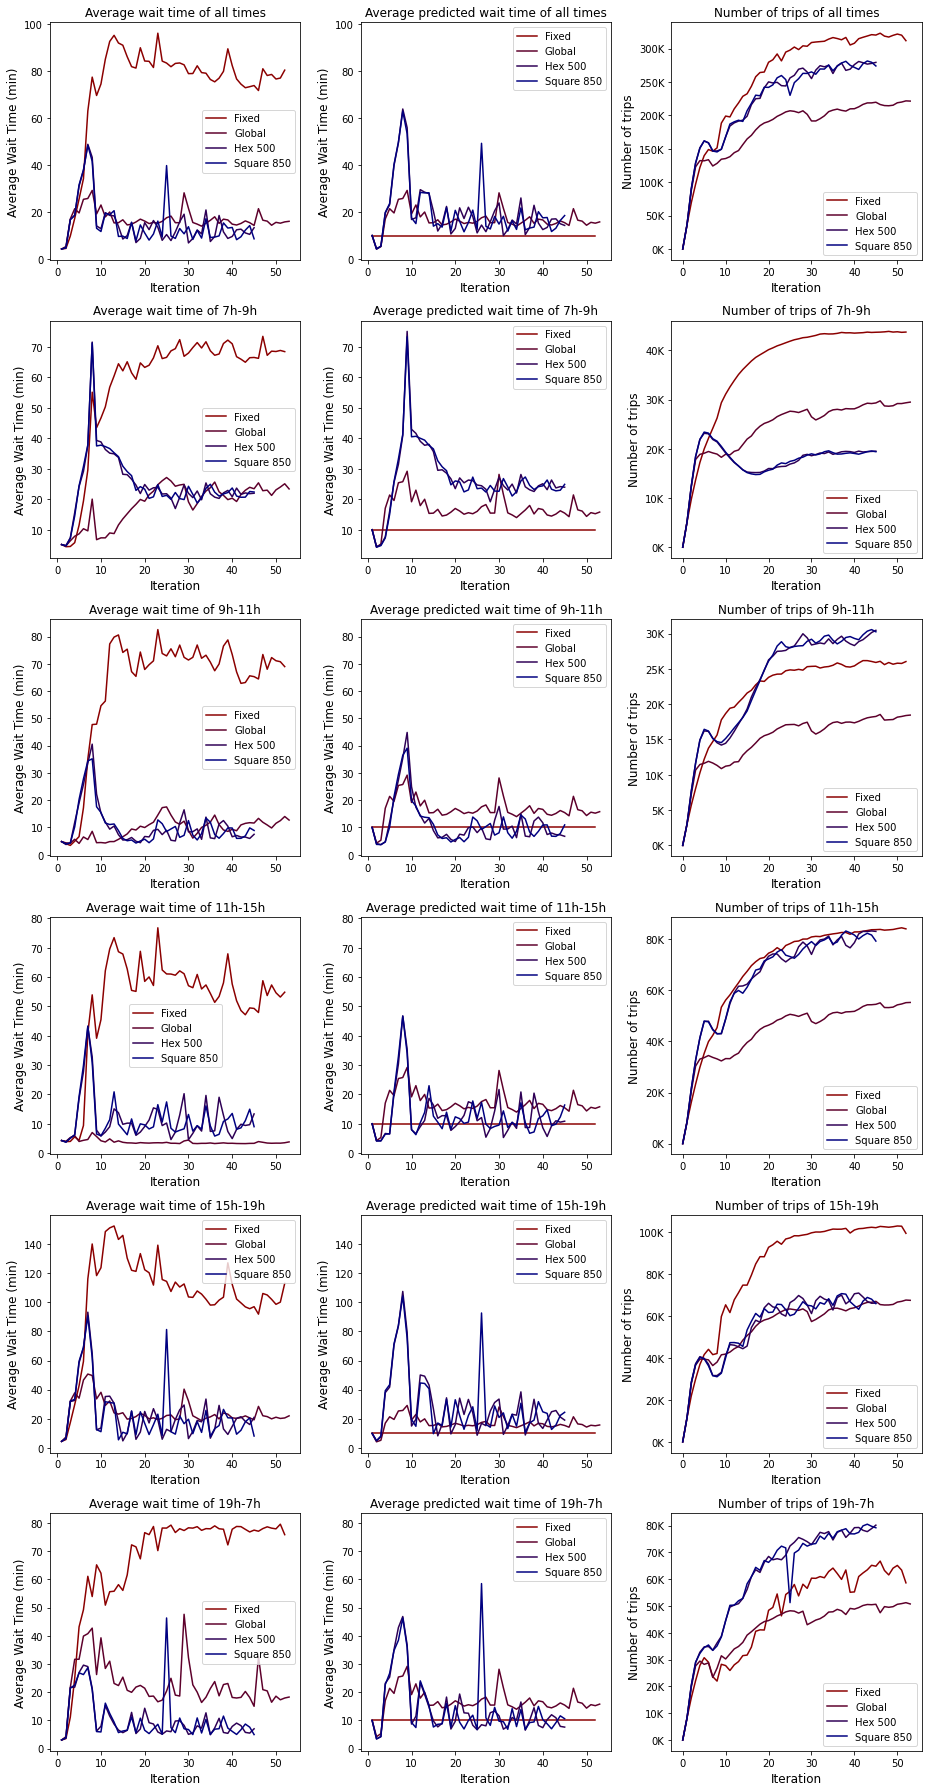

In [89]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color_fixed)

In [76]:
importlib.reload(predictions_evaluations)

<module 'predictions_evaluations' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/predictions_evaluations.py'>

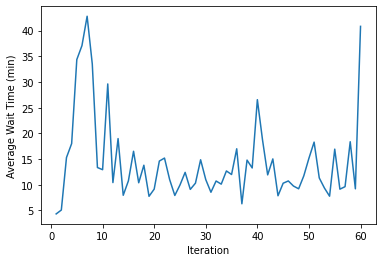

In [78]:
predictions_evaluations.plot_iteration_avg_wait_time_only_one(data_no_rej['dynamic_CN']['markov'][25])

In [93]:
start_time = 6
end_time = 24
bin_duration_min = 30
min_distance = 0
max_distance = 10000
bin_distance_m = 1000

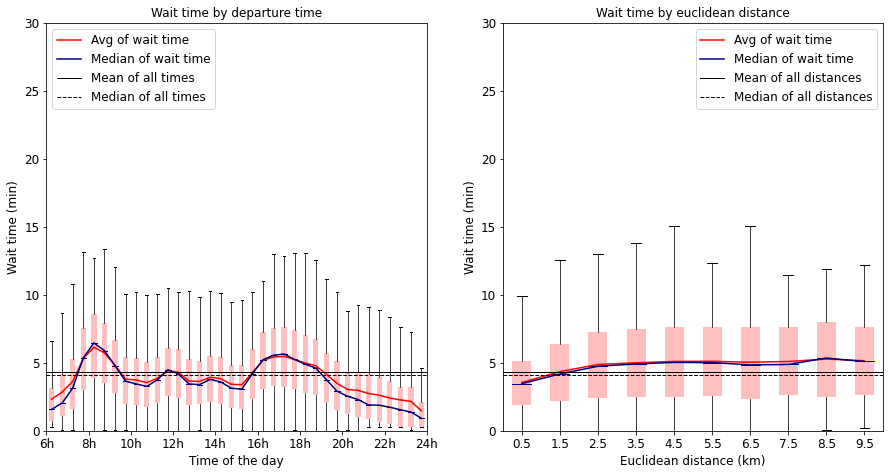

In [40]:
plotting_utils.plot_waiting_time(data_with_rej['dynamic_CN']['markov'][10],
                start_time, end_time, bin_duration_min,
                min_distance, max_distance, bin_distance_m, iteration=-1, 
                filter_router_zeros=False, add_boxplots=True, ylim=30)

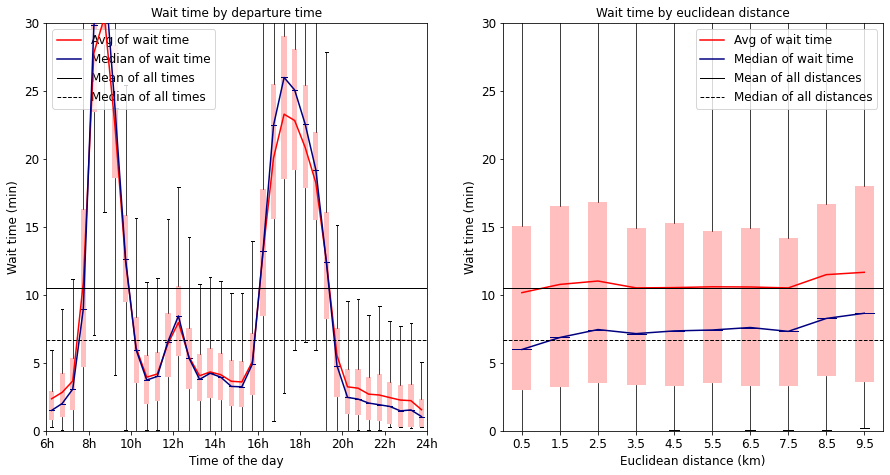

In [41]:
plotting_utils.plot_waiting_time(data_no_rej['dynamic_CN']['markov'][10],
                start_time, end_time, bin_duration_min,
                min_distance, max_distance, bin_distance_m, iteration=-1, 
                filter_router_zeros=False, add_boxplots=True, ylim=30)

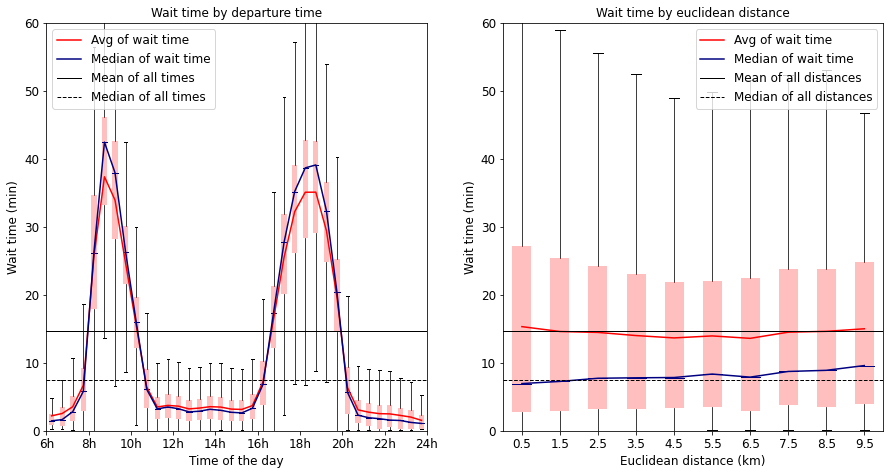

In [71]:
plotting_utils.plot_waiting_time(data_no_rej['global']['markov'],
                start_time, end_time, bin_duration_min,
                min_distance, max_distance, bin_distance_m, iteration=-1, 
                filter_router_zeros=False, add_boxplots=True, ylim=60)

In [108]:
importlib.reload(plotting_utils)

<module 'plotting_utils' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/plotting_utils.py'>

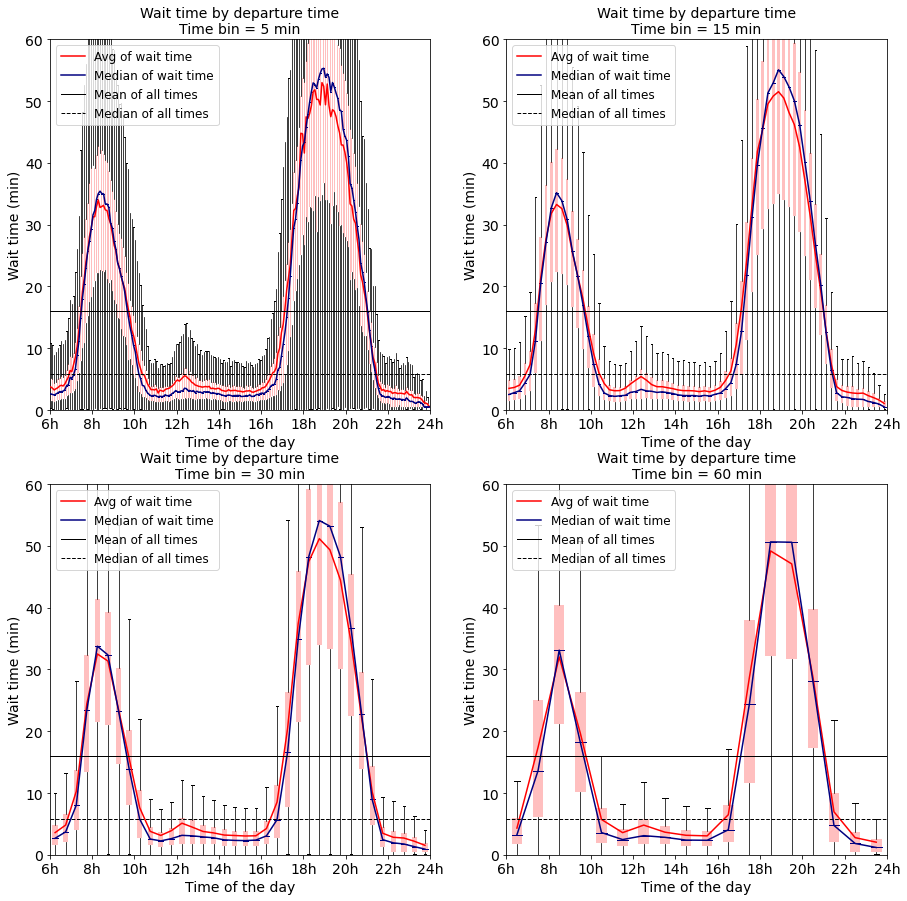

In [100]:
bin_durations_min = [5,15,30,60]

plotting_utils.plot_waiting_time_multiple_time_bins(
    data_no_rej['global']['markov'], start_time, end_time, bin_durations_min, iteration=-1,
    filter_router_zeros=False, add_boxplots=True, ylim=60, save=True,
    filename='/cluster/home/mfrancesc/IVT/paper_figures/zurich_waitTime_multipleTime.pdf')

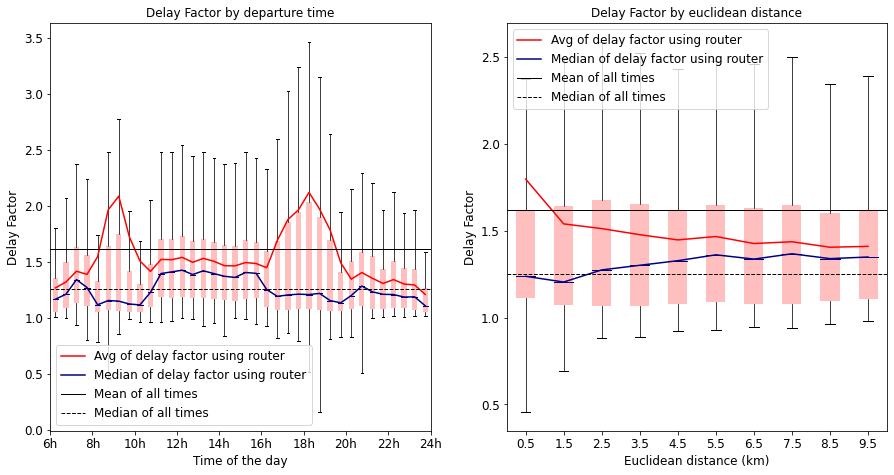

In [77]:
plotting_utils.plot_delay_factor(data_no_rej['global']['markov'], start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=-1, 
                plot_estimated=False, plot_using_sum=False, filter_router_zeros=False,
                                add_boxplots=True)

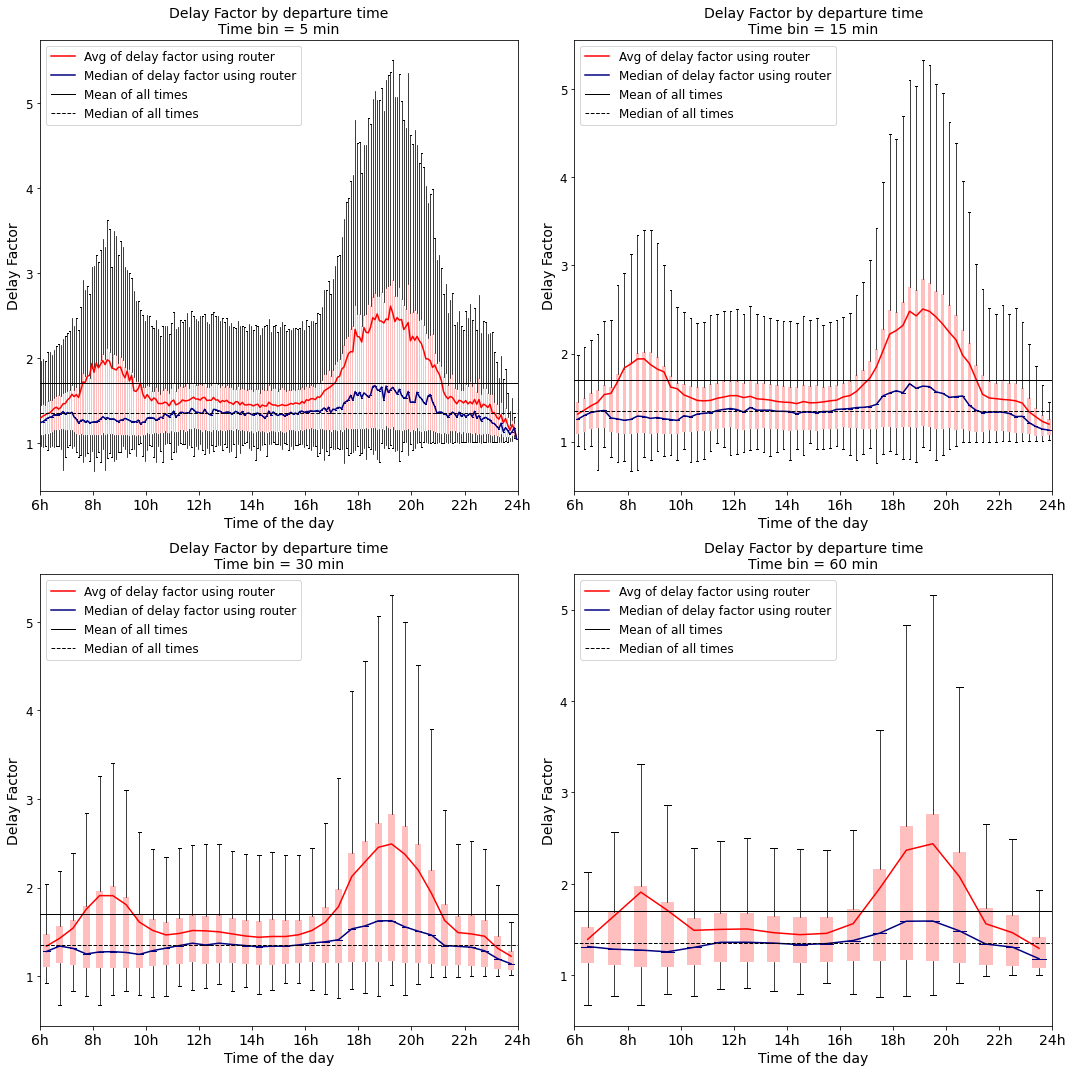

In [106]:
plotting_utils.plot_df_multiple_time_bins(
    data_no_rej['global']['markov'], start_time, end_time, bin_durations_min, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False, add_boxplots=True, save=True,
    filename='/cluster/home/mfrancesc/IVT/paper_figures/delayFactor_multipleTime.pdf')

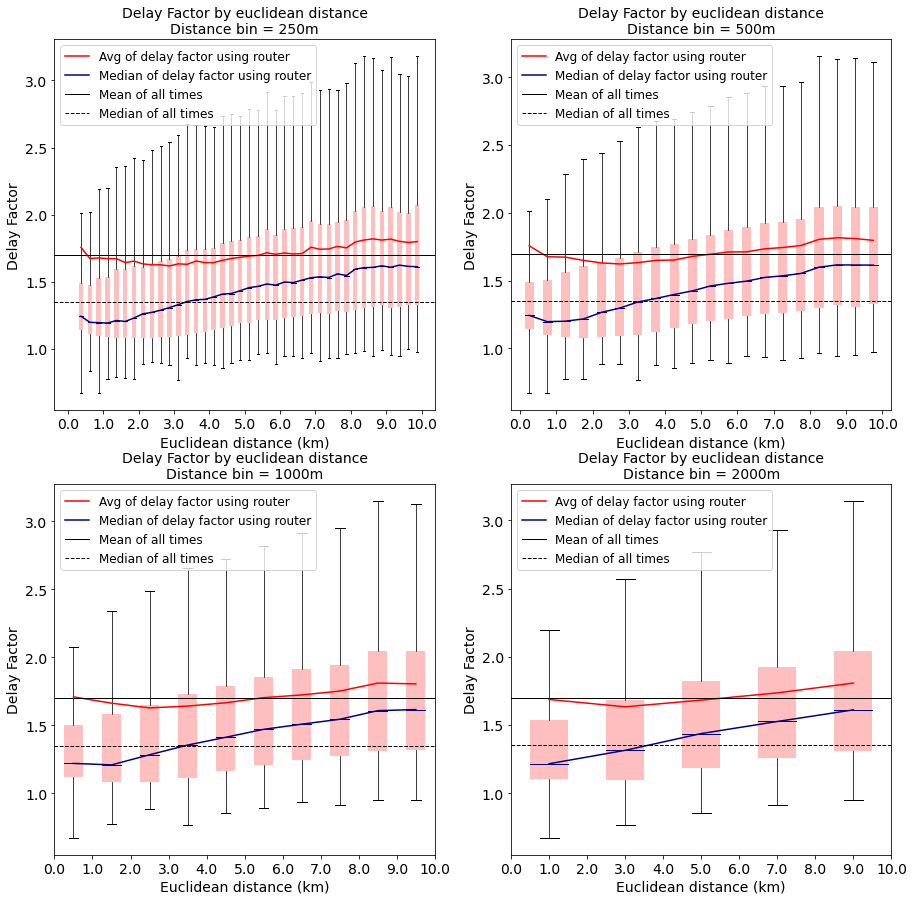

In [109]:
bin_distances_m = [250, 500, 1000, 2000]
plotting_utils.plot_df_multiple_distance_bins(
    data_no_rej['global']['markov'], min_distance, max_distance, bin_distances_m, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False, add_boxplots=True, save=True,
    filename='/cluster/home/mfrancesc/IVT/paper_figures/delayFactor_multipleDistance.pdf')

In [82]:
data_no_rej['hex_500'].keys()

dict_keys(['drt_legs', 'global_stats', 'drt_trips_stats', 'drt_predictions', 'binned_wait_time', 'binned_delay_factor', 'link2zones', 'fixedZones', 'stopwatch'])

  0%|          | 0/7 [00:00<?, ?it/s]

Imputing 1131  zones onto 77530  points by spatial join...


100%|██████████| 7/7 [00:00<00:00,  9.62it/s]


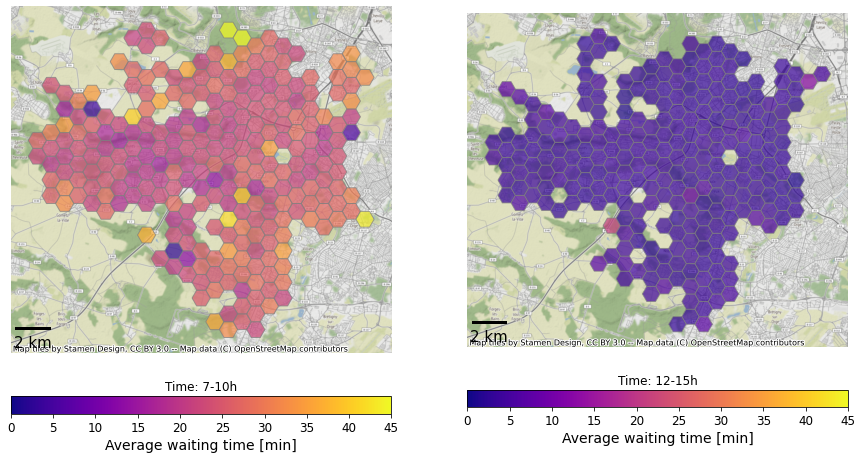

In [91]:
it_drt_trips_stats = data_no_rej['global']['markov']['drt_trips_stats'][last_iter].copy(deep=True)
zones = data_no_rej['hex_500']['fixedZones'].copy(deep=True)
zones.crs = 'EPSG:2154'
zones_id = 'zoneId'
idf_plotting.plot_average_waitTime_per_timeBins_custom(it_drt_trips_stats, zones, zones_id, vmin=0, vmax=45)

count      mean       std        min  \
title                                                                          
Hex 500 markov rej on iteration 60     4310.0 -0.019652  2.525835  -9.116667   
Hex 500 markov no rej on iteration 60  4305.0 -0.046867  5.748455 -36.657143   
CN=10 markov rej on iteration 60       4340.0  0.026735  2.485343  -7.853333   
CN=10 markov no rej on iteration 60    4334.0  0.133340  7.376510 -29.110000   
CN=25 markov rej on iteration 60       4329.0 -0.030495  2.378807  -7.144667   
CN=25 markov no rej on iteration 60    4358.0  0.347649  5.731924 -32.156000   

                                            25%       50%       75%       95%  \
title                                                                           
Hex 500 markov rej on iteration 60    -1.848915 -0.123652  1.746167  4.063093   
Hex 500 markov no rej on iteration 60 -2.361111  0.082639  2.795370  8.085739   
CN=10 markov rej on iteration 60      -1.800000 -0.083333  1.761667  4.268583   
CN=10 markov no rej on iteration 60   -2.297500  0.103333  2.751250  8.194250   
CN=25 markov rej on iteration 60      -1.820667 -0.071333  1.667333  4.002400   
CN=25 markov no rej on iteration 60   -2.106500  0.444667  3.178333  8.440467   

                                             99%         max        MSE  \
title                                                                     
Hex 500 markov rej on iteration 60      5.779590   22.017754   6.378748   
Hex 500 markov no rej on iteration 60  14.708444   65.950000  33.039259   
CN=10 markov rej on iteration 60        5.859517   12.225000   6.176223   
CN=10 markov no rej on iteration 60    15.435250  310.943333  54.418125   
CN=25 markov rej on iteration 60        5.293707    7.788000   5.658344   
CN=25 markov no rej on iteration 60    14.322047   60.268667  32.968271   

                                           RMSE       MAE  % errors < 0  
title                                                                    
Hex 500 markov rej on iteration 60     2.525618  2.028429     51.531323  
Hex 500 markov no rej on iteration 60  5.747979  3.834374     48.408827  
CN=10 markov rej on iteration 60       2.485201  2.020435     51.129032  
CN=10 markov no rej on iteration 60    7.376864  3.866829     48.846331  
CN=25 markov rej on iteration 60       2.378727  1.951908     51.074151  
CN=25 markov no rej on iteration 60    5.741800  3.860795     44.814135

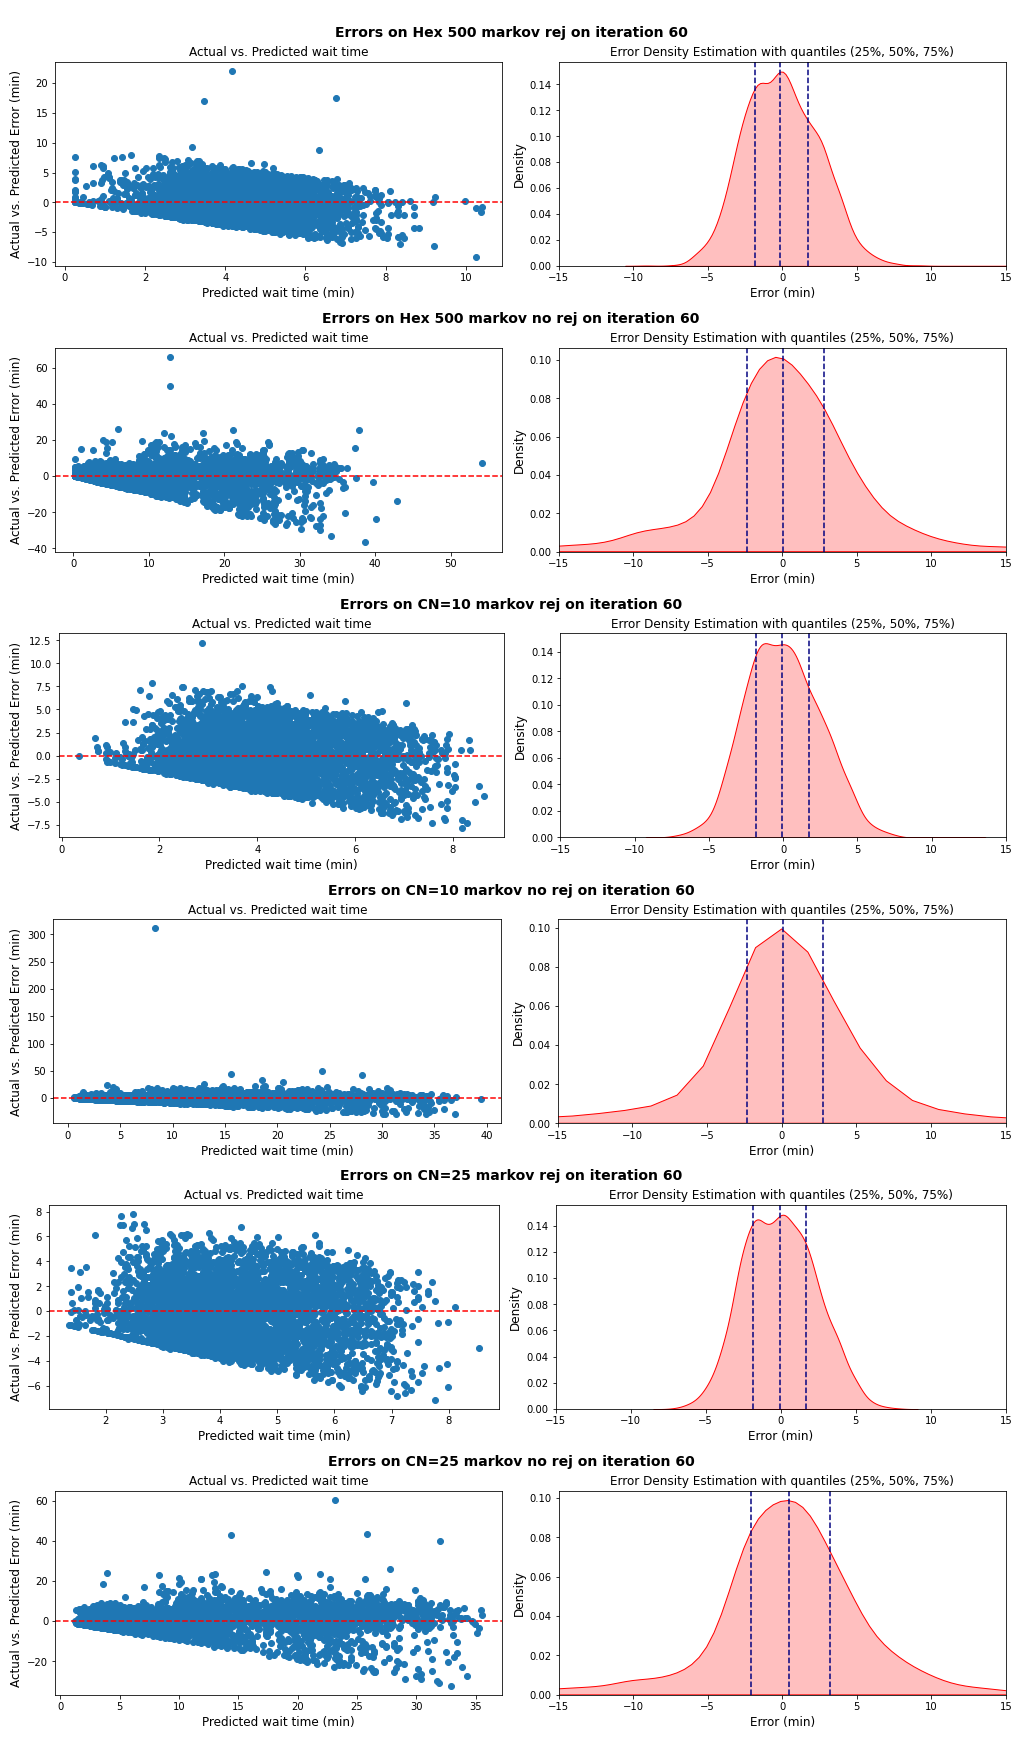

In [57]:
_ = predictions_evaluations.plot_multiple_actual_vs_fitted(compare_rej, 'waitTime', kde_plot_limit=15)

In [69]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ("Hex 500 markov rej", data_with_rej['hex_500']['markov'], c_gradient[0], '-'),
    ("Hex 500 markov no rej", data_no_rej['hex_500'], c_gradient[1], '--'),
    ("Global markov no rej", data_no_rej['global']['markov'], c_gradient[2], ':')
]


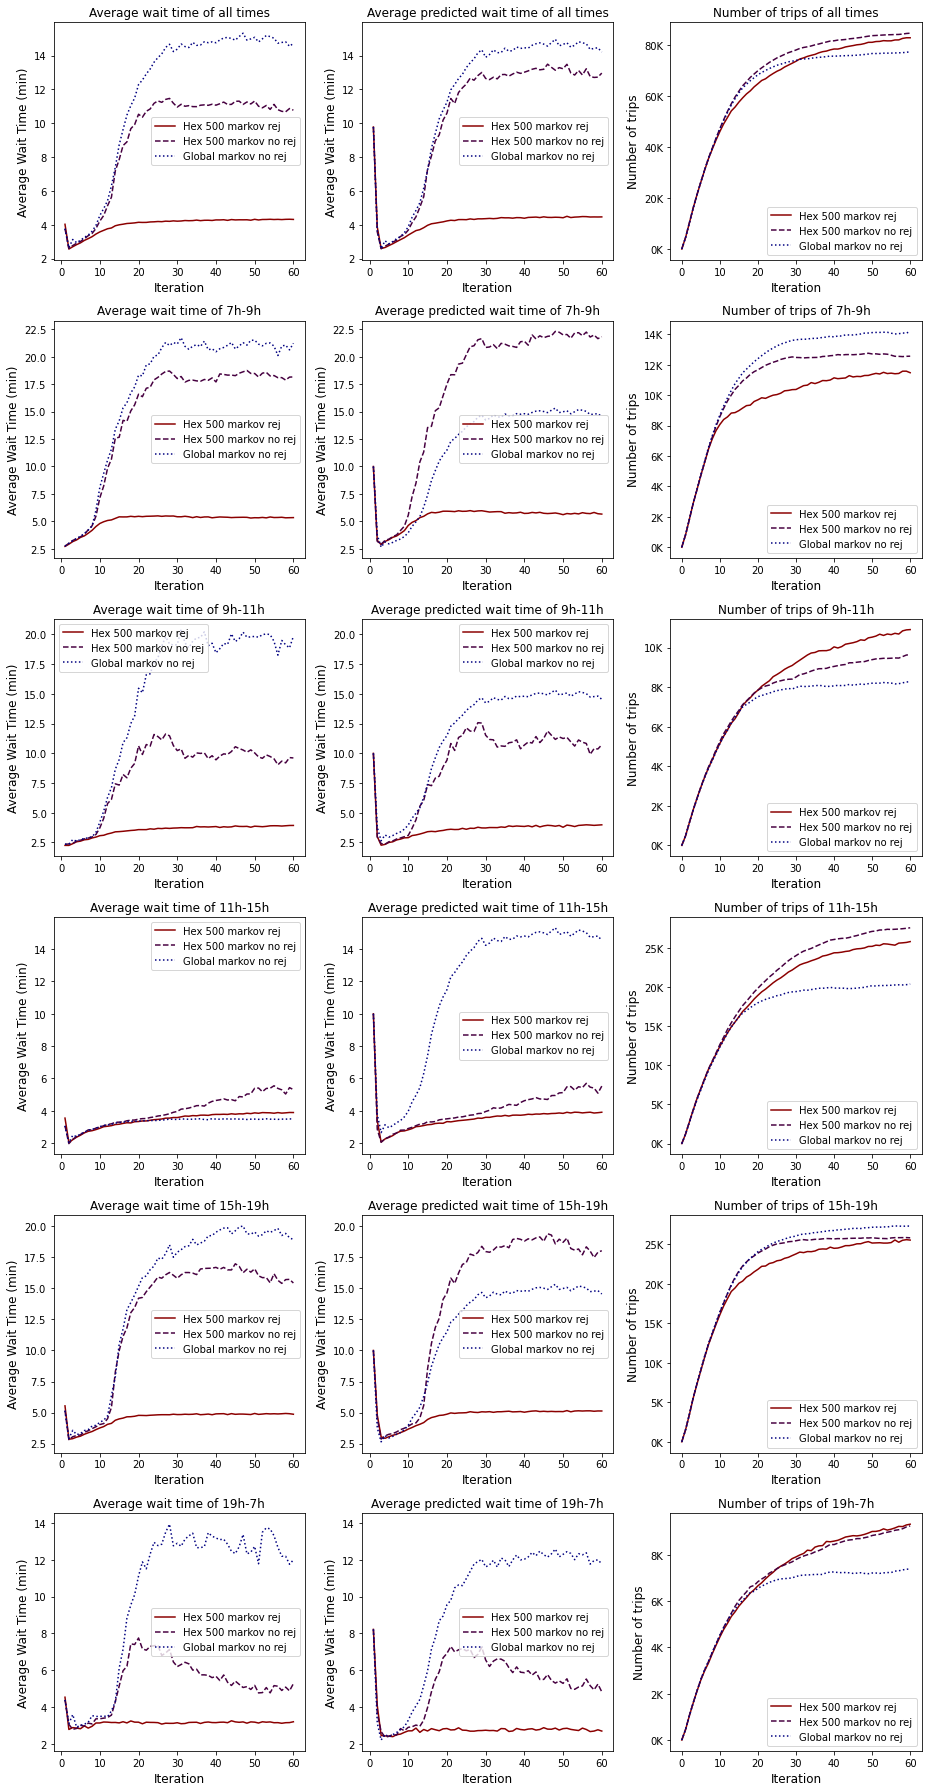

In [70]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color)